# Assignment 4 Part 1
###  Brain Size and Intelligence
##### Variable Names: 
1. Gender: Male or Female 
2. FSIQ: Full Scale IQ scores based on the four Wechsler (1981) subtests 
3. VIQ: Verbal IQ scores based on the four Wechsler (1981) subtests 
4. PIQ: Performance IQ scores based on the four Wechsler (1981) subtests 
5. Weight: body weight in pounds 
6. Height: height in inches 
7. MRI_Count: total pixel Count from the 18 MRI scans 

#### В данной работе для проверки связи между размером мозга и IQ, будет использоваться тест Пирсона.
#### Проверка гипотезы для коэффициента корреляции
Пусть r обозначает выборочный коэффициент корреляции, полученный по извлеченным из двумерного нормального распределения пар наблюдений (x1, y1),…,(xn, yn).

Коэффициент корреляции  в популяции неизвестен, но может быть оценен по выборке с помощью выборочного коэффициента корреляции r:

![](http://statistica.ru/upload/medialibrary/a7c/cor.PNG "Pearson coefficient")

где оценки среднего равны: 

![](http://statistica.ru/upload/medialibrary/550/xy.gif "Means")

Проверим значимость коэффициента корреляции. 

Нулевая гипотеза состоит в том, что коэффициент корреляции равен нулю, альтернативная - не равен нулю:

![](http://statistica.ru/upload/medialibrary/ff2/image001.png "Hypothesis")
![](http://statistica.ru/upload/medialibrary/252/image003.png "Hypotheses")

In [3]:
import pandas as pd
from pandas import plotting
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlib
import plotly.plotly as py
import pylab 
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
import math

brain_dat = pd.read_csv('brain_size.txt',sep='\t', header = 0, index_col=False)

In [7]:
brain_dat.describe()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


## 1. Для мужчин и женщин вместе.

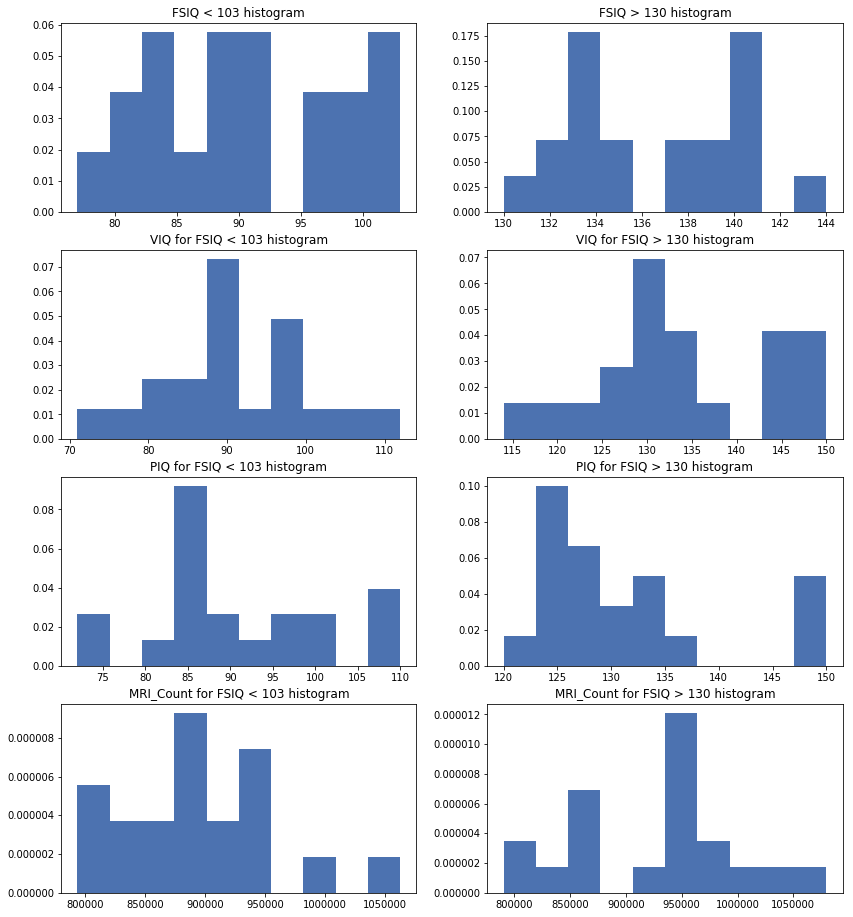

In [50]:
plt.style.use('seaborn-deep')
male_brain = brain_dat[brain_dat['Gender']=='Male']

female_brain = brain_dat[brain_dat['Gender']=='Female']

together_brain_less103 = brain_dat[brain_dat['FSIQ']<105]
together_brain_more130 = brain_dat[brain_dat['FSIQ']>125]

male_brain_less103 = together_brain_less103[together_brain_less103['Gender']=='Male']
male_brain_more130 = together_brain_more130[together_brain_more130['Gender']=='Female']

female_brain_less103 = together_brain_less103 [together_brain_less103['Gender']=='Male']
female_brain_more130 = together_brain_more130[together_brain_more130['Gender']=='Female']

fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize = (14,16))
ax[0,0].hist(together_brain_less103["FSIQ"], normed=True)
ax[0,0].set_title("FSIQ < 103 histogram")

ax[0,1].hist(together_brain_more130["FSIQ"], normed=True)
ax[0,1].set_title("FSIQ > 130 histogram")

ax[1,0].hist(together_brain_less103["VIQ"], normed=True)
ax[1,0].set_title("VIQ for FSIQ < 103 histogram")

ax[1,1].hist(together_brain_more130["VIQ"], normed=True)
ax[1,1].set_title("VIQ for FSIQ > 130 histogram")

ax[2,0].hist(together_brain_less103["PIQ"], normed=True)
ax[2,0].set_title("PIQ for FSIQ < 103 histogram")

ax[2,1].hist(together_brain_more130["PIQ"], normed=True)
ax[2,1].set_title("PIQ for FSIQ > 130 histogram");

ax[3,0].hist(together_brain_less103["MRI_Count"], normed=True)
ax[3,0].set_title("MRI_Count for FSIQ < 103 histogram")

ax[3,1].hist(together_brain_more130["MRI_Count"], normed=True)
ax[3,1].set_title("MRI_Count for FSIQ > 130 histogram");

Гистограммы для уровней IQ и размеров мозга имеют сильно выраженную неоднородность и несколько максимумов. Это связано с тем, что данные гистограммы построены и для девушек и для мужчин.

,FSIQ and PIQ for FSIQ < 103,FSIQ and PIQ for FSIQ > 130,FSIQ and VIQ for FSIQ < 103,FSIQ and VIQ for FSIQ > 130,VIQ and PIQ for FSIQ < 103,VIQ and PIQ for FSIQ > 130
Pearson’s correlation coefficient,0.701485,0.310124,0.713022,0.639718,0.018753,-0.485927
2-tailed p-value,0.000568,0.183286,0.000417,0.002386,0.937452,0.029838


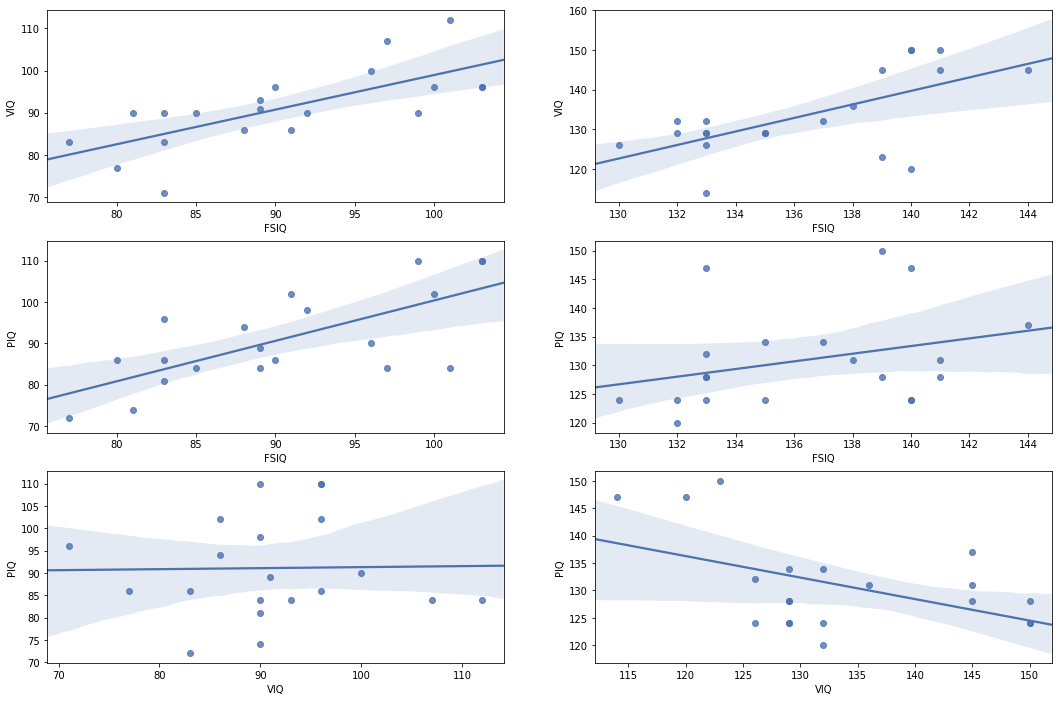

In [58]:
plt.figure(figsize=(18,12))
plt.subplot(321)
sns.regplot(together_brain_less103["FSIQ"],together_brain_less103["VIQ"])
plt.subplot(322)
sns.regplot(together_brain_more130["FSIQ"],together_brain_more130["VIQ"])
plt.subplot(323)
sns.regplot(together_brain_less103["FSIQ"],together_brain_less103["PIQ"])
plt.subplot(324)
sns.regplot(together_brain_more130["FSIQ"],together_brain_more130["PIQ"])
plt.subplot(325)
sns.regplot(together_brain_less103["VIQ"],together_brain_less103["PIQ"]);
plt.subplot(326)
sns.regplot(together_brain_more130["VIQ"],together_brain_more130["PIQ"]);

personDf = pd.DataFrame({
     'FSIQ and VIQ for FSIQ < 103': stats.pearsonr(together_brain_less103["FSIQ"],together_brain_less103["VIQ"]),
     'FSIQ and PIQ for FSIQ < 103': stats.pearsonr(together_brain_less103["FSIQ"],together_brain_less103["PIQ"]),
     'VIQ and PIQ for FSIQ < 103': stats.pearsonr(together_brain_less103["VIQ"],together_brain_less103["PIQ"]),
     'FSIQ and VIQ for FSIQ > 130': stats.pearsonr(together_brain_more130["FSIQ"],together_brain_more130["VIQ"]),
     'FSIQ and PIQ for FSIQ > 130': stats.pearsonr(together_brain_more130["FSIQ"],together_brain_more130["PIQ"]),
     'VIQ and PIQ for FSIQ > 130': stats.pearsonr(together_brain_more130["VIQ"],together_brain_more130["PIQ"])
}, index=['Pearson’s correlation coefficient','2-tailed p-value'])
personDf

Исходя из построенных выше графиков и расчитанных коэффициентов Пирсона можно сделать вывод, что PIQ и VIQ имеют(если и имеют) очень слабую связь между собой. FSIQ так как это обобщение результатов VIQ и PIQ, коррелирован с ними обоими.

,MRI_Count and FSIQ < 103,MRI_Count and FSIQ for FSIQ > 130,MRI_Count and PIQ for FSIQ < 103,MRI_Count and PIQ for FSIQ > 130,MRI_Count and VIQ for FSIQ > 130,MRI_Count and VSIQ for FSIQ < 103
Pearson’s correlation coefficient,0.527300,0.548285,0.586189,0.201268,0.406686,0.146366
2-tailed p-value,0.016887,0.012314,0.006602,0.394825,0.075160,0.538060


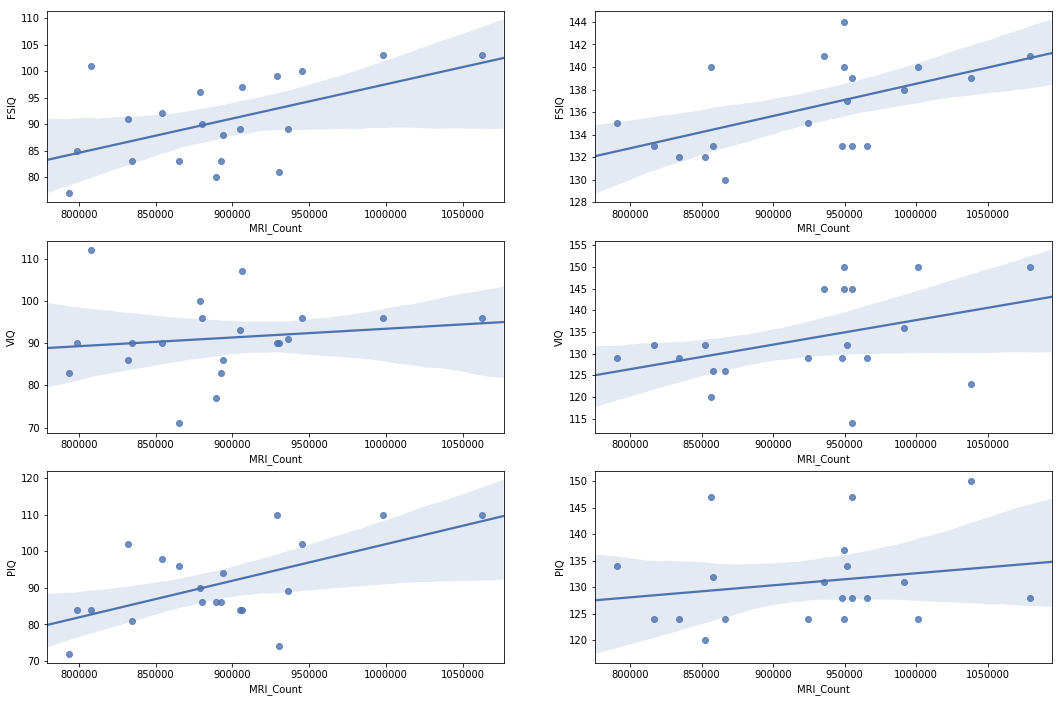

In [57]:
plt.figure(figsize=(18,12))
plt.subplot(321)
sns.regplot(together_brain_less103["MRI_Count"],together_brain_less103["FSIQ"])
plt.subplot(322)
sns.regplot(together_brain_more130["MRI_Count"],together_brain_more130["FSIQ"])
plt.subplot(323)
sns.regplot(together_brain_less103["MRI_Count"],together_brain_less103["VIQ"])
plt.subplot(324)
sns.regplot(together_brain_more130["MRI_Count"],together_brain_more130["VIQ"])
plt.subplot(325)
sns.regplot(together_brain_less103["MRI_Count"],together_brain_less103["PIQ"]);
plt.subplot(326)
sns.regplot(together_brain_more130["MRI_Count"],together_brain_more130["PIQ"]);

personDf = pd.DataFrame({
     'MRI_Count and FSIQ < 103': stats.pearsonr(together_brain_less103["MRI_Count"],together_brain_less103["FSIQ"]),
     'MRI_Count and VSIQ for FSIQ < 103': stats.pearsonr(together_brain_less103["MRI_Count"],together_brain_less103["VIQ"]),
     'MRI_Count and PIQ for FSIQ < 103': stats.pearsonr(together_brain_less103["MRI_Count"],together_brain_less103["PIQ"]),
     'MRI_Count and FSIQ for FSIQ > 130': stats.pearsonr(together_brain_more130["MRI_Count"],together_brain_more130["FSIQ"]),
     'MRI_Count and VIQ for FSIQ > 130': stats.pearsonr(together_brain_more130["MRI_Count"],together_brain_more130["VIQ"]),
     'MRI_Count and PIQ for FSIQ > 130': stats.pearsonr(together_brain_more130["MRI_Count"],together_brain_more130["PIQ"])
}, index=['Pearson’s correlation coefficient','2-tailed p-value'])
personDf

Коэффициенты Пирсона не превышают 60% и по p-value можно было бы судить только о наличии связи между FSIQ и MRI_Count, так как по результатам данного теста и пографикам, можно судить, что присутствует некоторая коллерированность между данными случаными величинами. Но между MRI_Count и VIQ и PIQ связь стастически не значима исходя из тестов Пирсона на 5% уровне значимости.

Но построим зависимость MRI_Count от FSIQ без деления на группы.

,MRI_Count and FSIQ for men and women together
Pearson’s correlation coefficient,0.357641
2-tailed p-value,0.023469


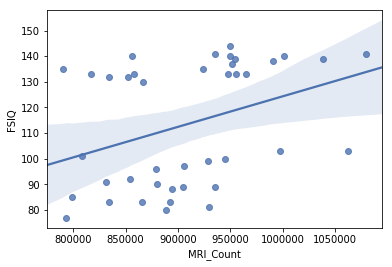

In [54]:
sns.regplot(brain_dat["MRI_Count"],brain_dat["FSIQ"])

personDf = pd.DataFrame({
     'MRI_Count and FSIQ for men and women together': stats.pearsonr(brain_dat["MRI_Count"],brain_dat["FSIQ"]),
}, index=['Pearson’s correlation coefficient','2-tailed p-value'])
personDf

Коэффицинт корреляции Пирсона очень маленький и хоть p-value меньше 5%, что говорит, что данный коэффициент статистически значим, по построенной диаграмме рассеянности можно видеть, что для группы с FSIQ < 103 и > 130 располгаются почти друг над другом и довольно высоки и низким показателям IQ соответствует один и тот же размер мозга. Хотя может это влияние того, что оба пола рассматриваются вместе, так как если посмотреть на группу точек соответствующей IQ > 130, большое количество точек находится над MRI_count = 950000, тогда как для группы IQ < 103 сгущение наблюдается на левое стороге, ближе к 850000.

## 2. Для мужчин.

,MRI_Count and FSIQ < 103,MRI_Count and FSIQ for FSIQ > 130,MRI_Count and PIQ for FSIQ < 103,MRI_Count and PIQ for FSIQ > 130,MRI_Count and VIQ for FSIQ > 130,MRI_Count and VSIQ for FSIQ < 103
Pearson’s correlation coefficient,0.714624,0.359098,0.802034,0.102797,0.404046,0.287903
2-tailed p-value,0.020213,0.308171,0.005251,0.777494,0.246856,0.419868


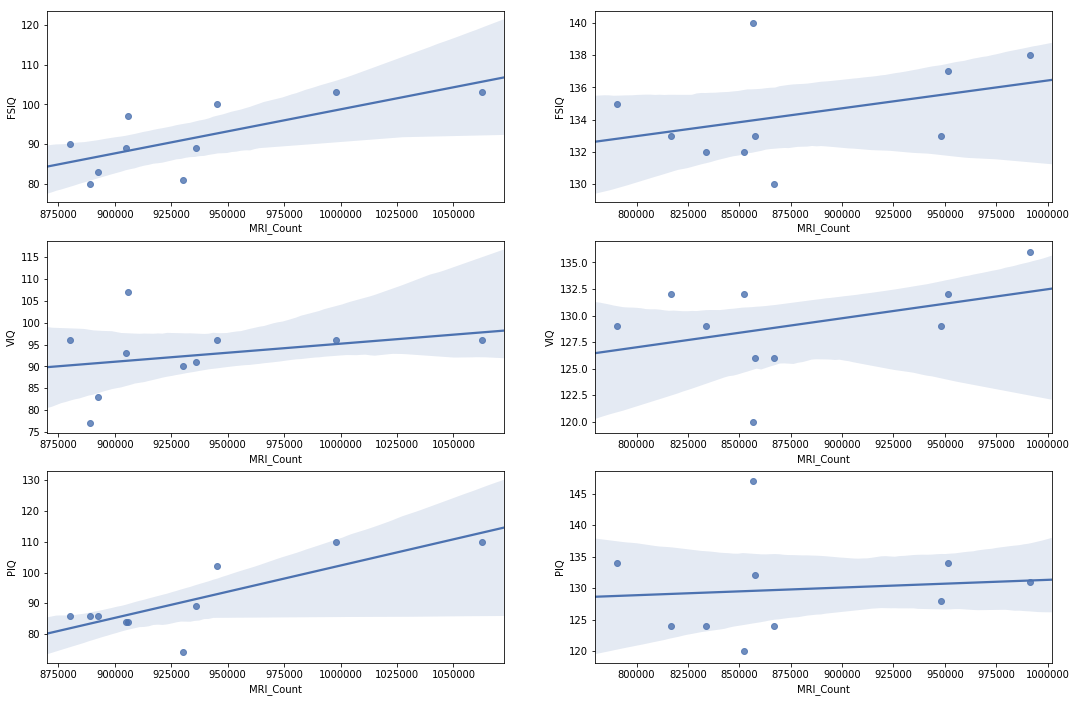

In [60]:
plt.figure(figsize=(18,12))
plt.subplot(321)
sns.regplot(male_brain_less103["MRI_Count"],male_brain_less103["FSIQ"])
plt.subplot(322)
sns.regplot(male_brain_more130["MRI_Count"],male_brain_more130["FSIQ"])
plt.subplot(323)
sns.regplot(male_brain_less103["MRI_Count"],male_brain_less103["VIQ"])
plt.subplot(324)
sns.regplot(male_brain_more130["MRI_Count"],male_brain_more130["VIQ"])
plt.subplot(325)
sns.regplot(male_brain_less103["MRI_Count"],male_brain_less103["PIQ"]);
plt.subplot(326)
sns.regplot(male_brain_more130["MRI_Count"],male_brain_more130["PIQ"]);

personDf = pd.DataFrame({
     'MRI_Count and FSIQ < 103': stats.pearsonr(male_brain_less103["MRI_Count"],male_brain_less103["FSIQ"]),
     'MRI_Count and VSIQ for FSIQ < 103': stats.pearsonr(male_brain_less103["MRI_Count"],male_brain_less103["VIQ"]),
     'MRI_Count and PIQ for FSIQ < 103': stats.pearsonr(male_brain_less103["MRI_Count"],male_brain_less103["PIQ"]),
     'MRI_Count and FSIQ for FSIQ > 130': stats.pearsonr(male_brain_more130["MRI_Count"],male_brain_more130["FSIQ"]),
     'MRI_Count and VIQ for FSIQ > 130': stats.pearsonr(male_brain_more130["MRI_Count"],male_brain_more130["VIQ"]),
     'MRI_Count and PIQ for FSIQ > 130': stats.pearsonr(male_brain_more130["MRI_Count"],male_brain_more130["PIQ"])
}, index=['Pearson’s correlation coefficient','2-tailed p-value'])
personDf

,MRI_Count and FSIQ for men
Pearson’s correlation coefficient,0.498369
2-tailed p-value,0.025319


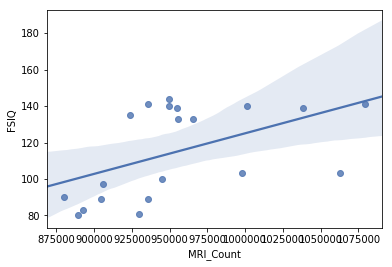

In [64]:
sns.regplot(male_brain["MRI_Count"],male_brain["FSIQ"])

personDf = pd.DataFrame({
     'MRI_Count and FSIQ for men': stats.pearsonr(male_brain["MRI_Count"],male_brain["FSIQ"]),
}, index=['Pearson’s correlation coefficient','2-tailed p-value'])
personDf

Коэффициент корреляции между размером мозга и IQ более существенный, нежели в совместной выборке и равен 0.5(положительная связь - чем больше мозг, тем больше IQ), p-value < 5%, так что данный коэффициент статистически значим и можно судить о наличии связи между этими величинами у мужчин.

## 3. Для женщин.

,MRI_Count and FSIQ < 103,MRI_Count and FSIQ for FSIQ > 130,MRI_Count and PIQ for FSIQ < 103,MRI_Count and PIQ for FSIQ > 130,MRI_Count and VIQ for FSIQ > 130,MRI_Count and VSIQ for FSIQ < 103
Pearson’s correlation coefficient,0.714624,0.359098,0.802034,0.102797,0.404046,0.287903
2-tailed p-value,0.020213,0.308171,0.005251,0.777494,0.246856,0.419868


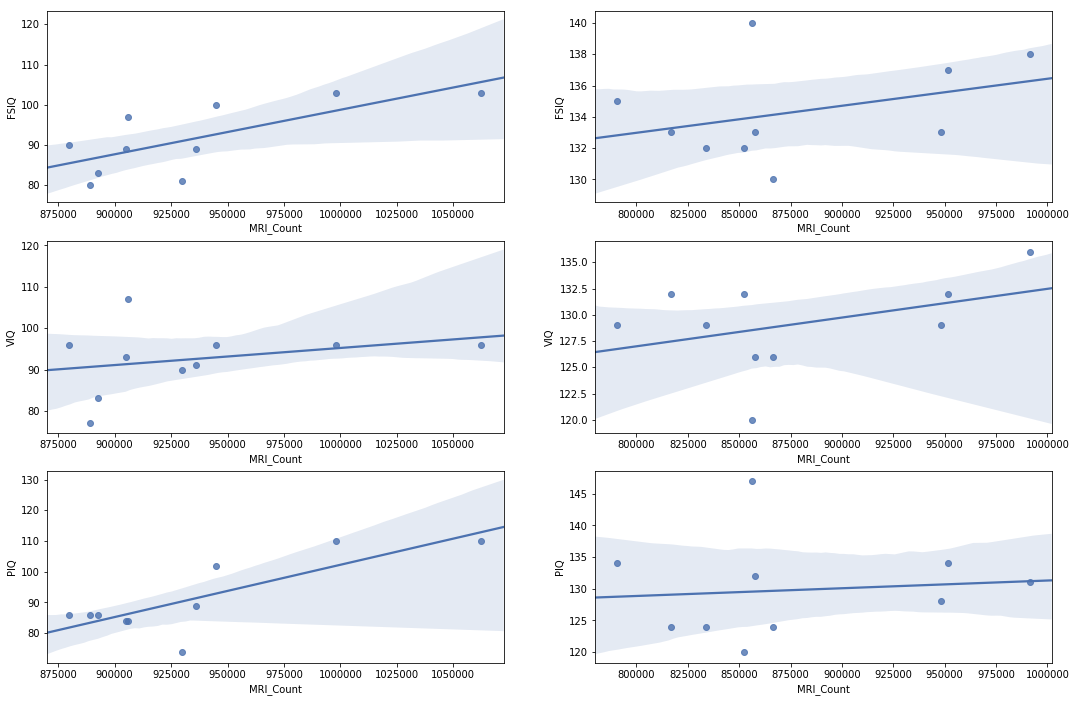

In [63]:
plt.figure(figsize=(18,12))
plt.subplot(321)
sns.regplot(female_brain_less103["MRI_Count"],female_brain_less103["FSIQ"])
plt.subplot(322)
sns.regplot(female_brain_more130["MRI_Count"],female_brain_more130["FSIQ"])
plt.subplot(323)
sns.regplot(female_brain_less103["MRI_Count"],female_brain_less103["VIQ"])
plt.subplot(324)
sns.regplot(female_brain_more130["MRI_Count"],female_brain_more130["VIQ"])
plt.subplot(325)
sns.regplot(female_brain_less103["MRI_Count"],female_brain_less103["PIQ"]);
plt.subplot(326)
sns.regplot(female_brain_more130["MRI_Count"],female_brain_more130["PIQ"]);

personDf = pd.DataFrame({
     'MRI_Count and FSIQ < 103': stats.pearsonr(female_brain_less103["MRI_Count"],female_brain_less103["FSIQ"]),
     'MRI_Count and VSIQ for FSIQ < 103': stats.pearsonr(female_brain_less103["MRI_Count"],female_brain_less103["VIQ"]),
     'MRI_Count and PIQ for FSIQ < 103': stats.pearsonr(female_brain_less103["MRI_Count"],female_brain_less103["PIQ"]),
     'MRI_Count and FSIQ for FSIQ > 130': stats.pearsonr(female_brain_more130["MRI_Count"],female_brain_more130["FSIQ"]),
     'MRI_Count and VIQ for FSIQ > 130': stats.pearsonr(female_brain_more130["MRI_Count"],female_brain_more130["VIQ"]),
     'MRI_Count and PIQ for FSIQ > 130': stats.pearsonr(female_brain_more130["MRI_Count"],female_brain_more130["PIQ"])
}, index=['Pearson’s correlation coefficient','2-tailed p-value'])
personDf

,MRI_Count and FSIQ for men
Pearson’s correlation coefficient,0.325697
2-tailed p-value,0.161116


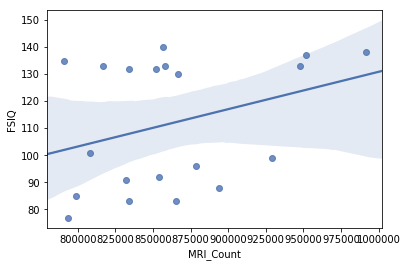

In [65]:
sns.regplot(female_brain["MRI_Count"],female_brain["FSIQ"])

personDf = pd.DataFrame({
     'MRI_Count and FSIQ for men': stats.pearsonr(female_brain["MRI_Count"],female_brain["FSIQ"]),
}, index=['Pearson’s correlation coefficient','2-tailed p-value'])
personDf

Коэффициент корреляции равен 0.33 и p-value>5%, данный коэффициент не является статистически значимым и нельзя по Пирсону сказать есть ли связь между размером мозга женщин и их IQ или нет. Дополнительное построение диаграммы так же не дает нам судить о наличии какой либо связи между этими случайными величинами.

### Вывод:
Коэффициент корреляции для совместной выборки равен 0.36

Для мужчин - 0.5

Для женщин - 0.33

Из всего вышесказанного можно заключить, что связь между размером мозги и IQ наблюдается у мужчин(чем их IQ больше тем больше их мозг), для того, чтобы судить о наличии данной связи у женщин нужны дополнительные исследования.